In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
SL = pd.read_csv("C:\\AI(ml&dl)\\jupiter(machine learning)\\Projetcs(ML)\\4_SalaryEstimator_K-NearestNeighbour\\salary.csv")
SL.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [3]:
SL.shape

(32561, 5)

In [4]:
SL.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [5]:
SL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [6]:
SL.isna().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [7]:
SL['income'].replace({'<=50K':0,'>50K':1},inplace = True)
SL.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


<AxesSubplot:>

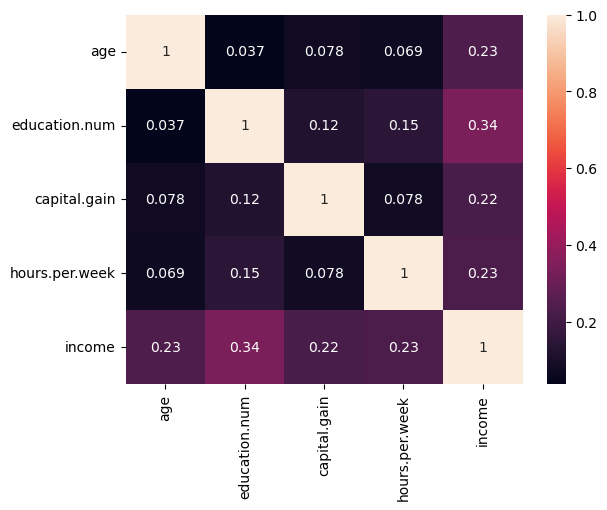

In [8]:
sns.heatmap(SL.corr(),annot=True)

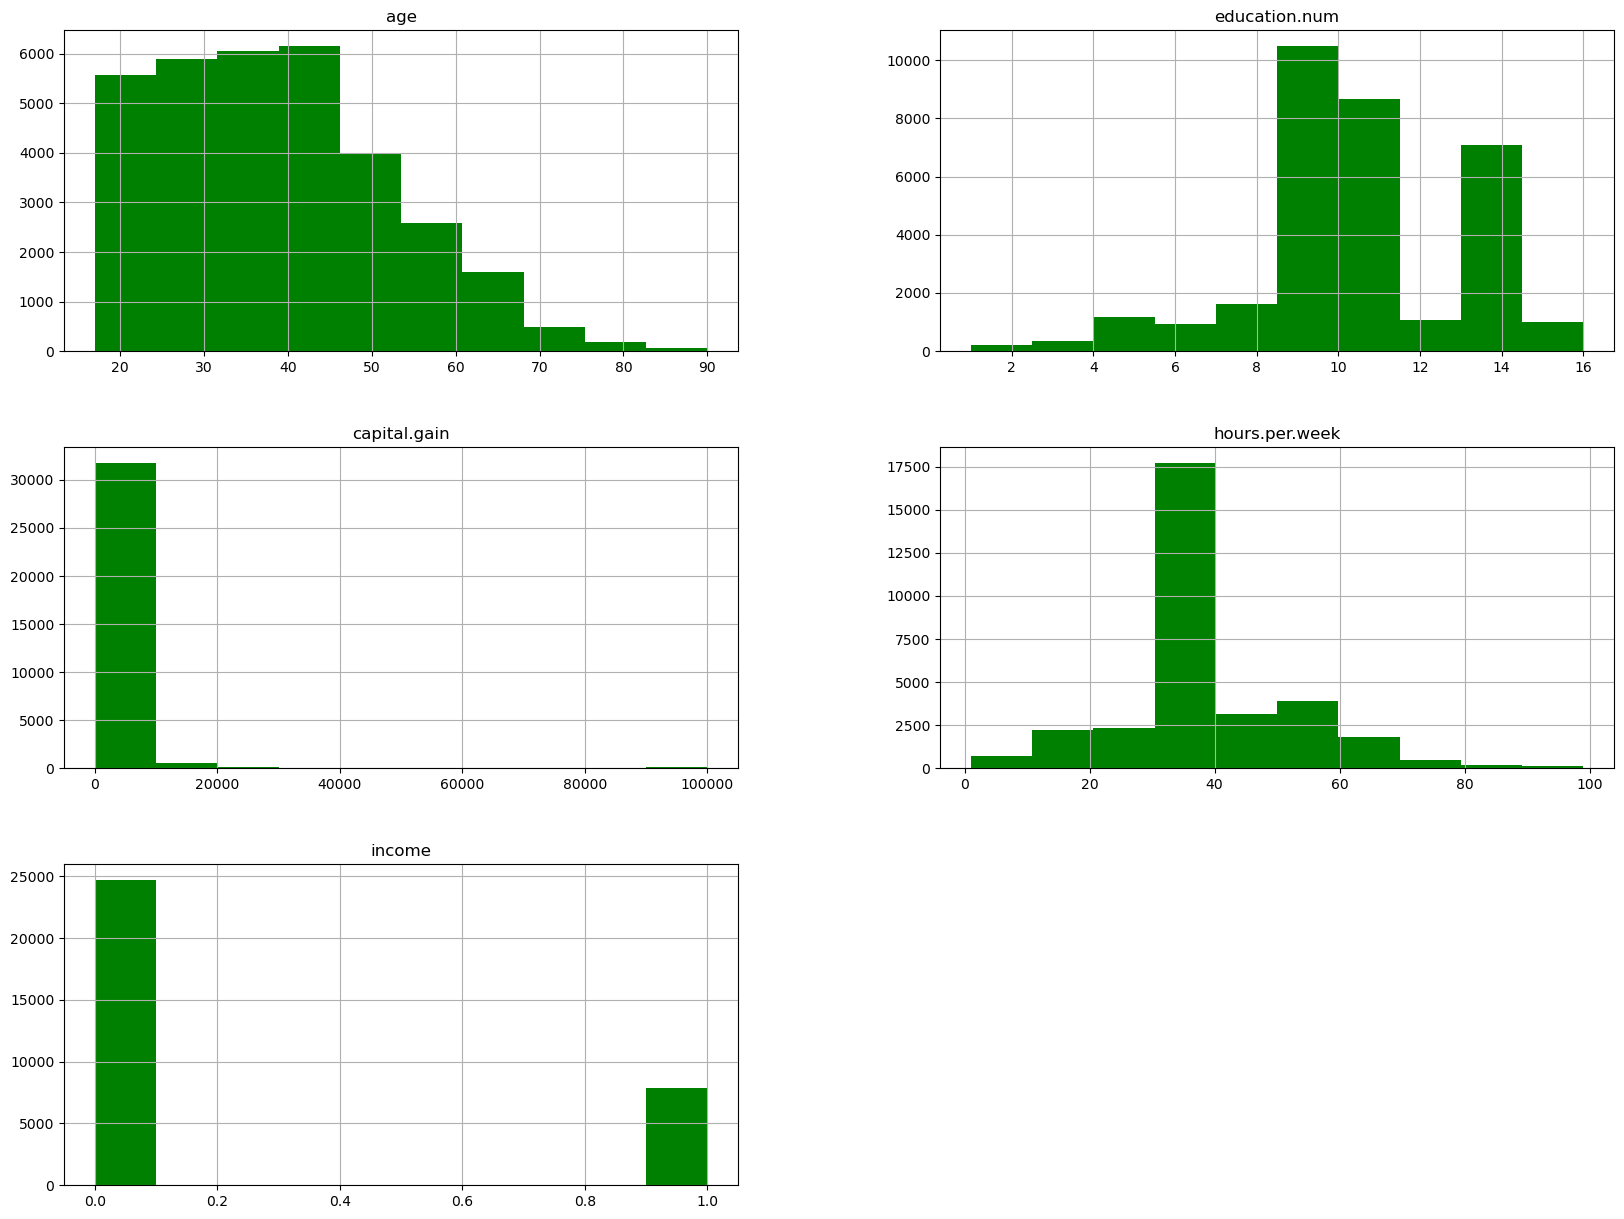

In [9]:
SL.hist(figsize=(20,15),color = 'green')
plt.show()

In [10]:
y = SL.income
y.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
SL.drop('income',axis = 1,inplace = True)

In [12]:
x = SL.values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size = 0.20,random_state = 0)
x_train.shape

(26048, 4)

In [17]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [27]:
pred = model.predict(x_test)


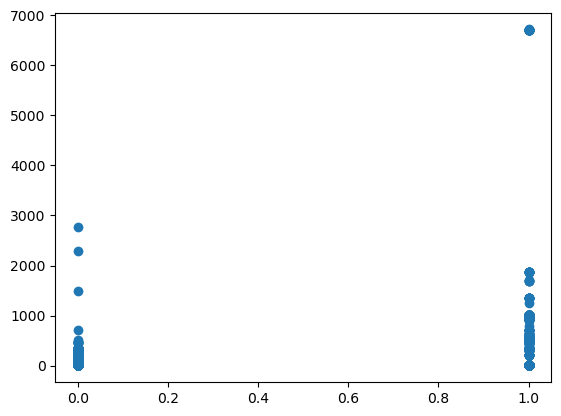

In [29]:
plt.scatter(y_test,pred)

In [30]:
age = int(input('Enter Person Age'))
edu = int(input('Enter Person Eduacation'))
cap = int(input('Enter Person Capital gain'))
hpw = int(input('Enter Person Hours Per Week'))
person = [[age,edu,cap,hpw]]
result = model.predict(person)
print(result)

if  result == 1:
    print('The person might got salary above 50K')
else:
    print('The person might not got salary above 50K')
                

Enter Person Age90
Enter Person Eduacation9
Enter Person Capital gain0
Enter Person Hours Per Week40
[11.87317468]
The person might not got salary above 50K
